# Analyse exploratoire des données du Dataset COVID


Import des fichiers Metadata au format csv dans un Dataframe

In [1]:
import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('COVID.metadata.csv', delimiter=';')
df2 = pd.read_csv('Lung_Opacity.metadata.csv', delimiter=';')
df3 = pd.read_csv('Normal.metadata.csv', delimiter=';')
df4 = pd.read_csv("Viral Pneumonia.metadata.csv", delimiter=';')

# Ajout d'une colonne Classification
# Même nommage que dossiers des images par simplicité d'utilisation dans un premier temps
df1['classification'] = 'COVID'
df2['classification'] = 'Lung_Opacity'
df3['classification'] = 'Normal'
df4['classification'] = 'Viral Pneumonia'

df=pd.concat([df1, df2, df3, df4])

# Renommage des colonnes
df.rename(columns={"FILE NAME": 'file_name',
                   "FORMAT": 'format',
                   "SIZE": 'size',
                   "URL": 'url'
                   }, inplace=True)

# Renommage des fichiers NORMAL-xx en Normal-xx pour être conforme au dataset
df['file_name'] = df['file_name'].replace('NORMAL-', 'Normal-', regex=True)

display(df.head())

df.info()



,file_name,format,size,url,classification
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID


<class 'pandas.core.frame.DataFrame'>
Index: 21165 entries, 0 to 1344
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       21165 non-null  object
 1   format          21165 non-null  object
 2   size            21165 non-null  object
 3   url             21165 non-null  object
 4   classification  21165 non-null  object
dtypes: object(5)
memory usage: 992.1+ KB


Analyse des différentes variables

format
PNG    21165
Name: count, dtype: int64
Toutes les images ont le même format PNG

size
256*256    21165
Name: count, dtype: int64
Toutes les images ont la même taille 256*256

classification
Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: count, dtype: int64 



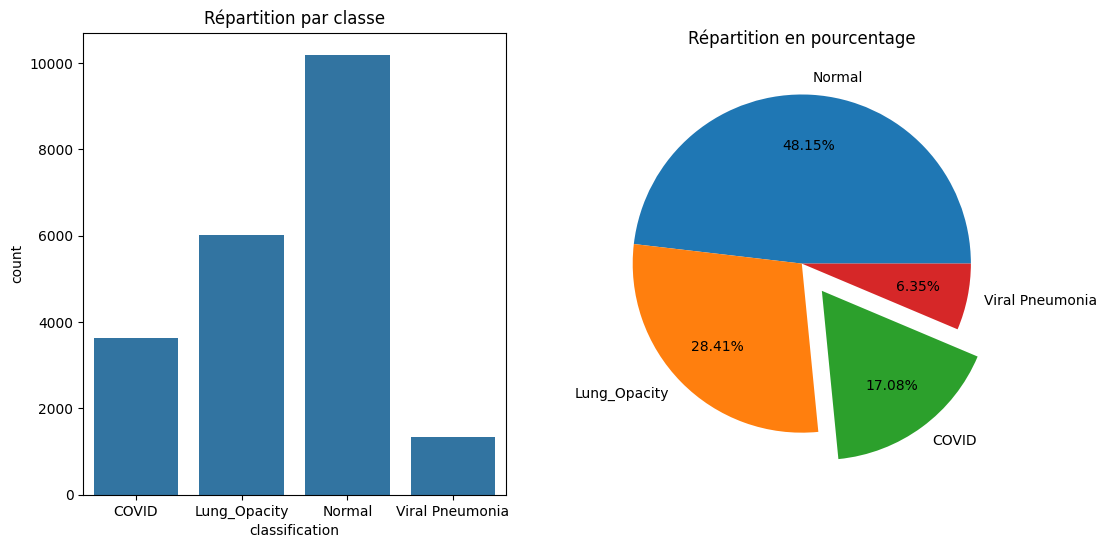

Répartition des sources de radio par classe :


classification   url                                                                            
COVID            https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711    2474
                 https://github.com/armiro/COVID-CXNet                                               400
                 https://eurorad.org                                                                 258
                 https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png           183
                 https://github.com/ieee8023/covid-chestxray-dataset                                 182
                 https://sirm.org/category/senza-categoria/covid-19/                                 119
Lung_Opacity     https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data                   6012
Normal           https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data                   8851
                 https://www.kaggle.com/paultimothymooney/chest

In [2]:
# Analyse variable FORMAT
print(df.format.value_counts())
print("Toutes les images ont le même format PNG\n")

# Analyse variable SIZE
print(df['size'].value_counts())
print("Toutes les images ont la même taille 256*256\n")

# Analyse variable Classification
class_repart = df.classification.value_counts()
print(class_repart, "\n")

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(data = df, x = 'classification')
plt.title("Répartition par classe")


plt.subplot(122)
plt.pie(x=class_repart.values,
        labels= class_repart.index,
        explode = [0, 0, 0.2, 0],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7,
        )
plt.title("Répartition en pourcentage")
plt.show()

# Analyse variable URL
print("Répartition des sources de radio par classe :")
display(df[['url', 'classification']].groupby("classification").value_counts())


Lecture et affichage de quelques images (1 par classe)

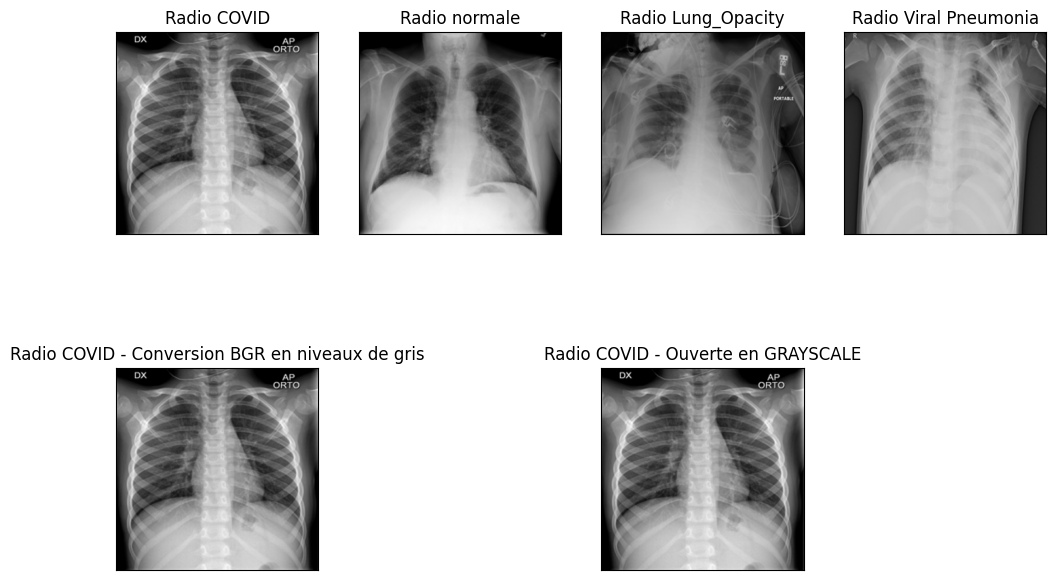

In [3]:

img1 = cv2.imread("COVID-19_Radiography_Dataset/COVID/images/COVID-13.png")

plt.figure(figsize=(12,8))
plt.subplot(241)
plt.xticks([])
plt.yticks([])
plt.imshow(img1)
plt.title("Radio COVID")


img2 = cv2.imread("COVID-19_Radiography_Dataset/NORMAL/images/NORMAL-13.png")

plt.subplot(242)
plt.xticks([])
plt.yticks([])
plt.imshow(img2)
plt.title("Radio normale")


img3 = cv2.imread("COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-13.png")

plt.subplot(243)
plt.xticks([])
plt.yticks([])
plt.imshow(img3)
plt.title("Radio Lung_Opacity")

img4 = cv2.imread("COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-13.png")

plt.subplot(244)
plt.xticks([])
plt.yticks([])
plt.imshow(img4)
plt.title("Radio Viral Pneumonia")

img5 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.subplot(245)
plt.xticks([])
plt.yticks([])
plt.imshow(img5, cmap='gray')
plt.title("Radio COVID - Conversion BGR en niveaux de gris")

img6 = cv2.imread("COVID-19_Radiography_Dataset/COVID/images/COVID-13.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(247)
plt.xticks([])
plt.yticks([])
plt.imshow(img6, cmap='gray')
plt.title("Radio COVID - Ouverte en GRAYSCALE")

plt.show()


Récupération des metadonnées des images pour quelques échantillons pour la classe COVID

In [4]:
import os

from random import sample

# Lecture des fichiers dans le répertoire
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
files = os.listdir(covid_path)
nb_files = len(files)
print("Il y a %i fichiers dans le répertoire %s" %(nb_files, covid_path))

# Récupération des metadonnées pour qqs fichiers pour tester les perfs de opencv
n = 10
index = sample(range(1,nb_files + 1), n)


list_shape=[]
list_file_name=[]

for i in index:
    file_name = "COVID-" + str(i) + ".png"
    file_path = covid_path + "/" + file_name
    print((file_name, file_path))
    img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  
    list_shape.append(img.shape)
    list_file_name.append("COVID-" + str(i))

print(list_shape)
df_shape = pd.DataFrame({'file_name': list_file_name, 'shape': list_shape})

df_shape.head()

Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
('COVID-2430.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2430.png')
('COVID-1711.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1711.png')
('COVID-845.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-845.png')
('COVID-395.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-395.png')
('COVID-2193.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2193.png')
('COVID-1619.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1619.png')
('COVID-2411.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2411.png')
('COVID-3211.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3211.png')
('COVID-1215.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1215.png')
('COVID-25.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-25.png')
[(299, 299), (299, 299), (299, 299), (299, 299), (299, 299), (299, 299), (299, 299), (299, 299), (299, 299), (299, 299)]


,file_name,shape
0,COVID-2430,"(299, 299)"
1,COVID-1711,"(299, 299)"
2,COVID-845,"(299, 299)"
3,COVID-395,"(299, 299)"
4,COVID-2193,"(299, 299)"


Généralisation à toutes les classes

In [5]:
folders = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

# Initialisation d'un DataFrame contenant les infos de shape des images
df_img = pd.DataFrame()

# Parcours des différents répertoires pour récupération infos images
for folder in folders:
    # Lecture des fichiers dans le répertoire
    path = "COVID-19_Radiography_Dataset/" + folder +"/images"
    files = os.listdir(path)
    nb_files = len(files)
    print("Il y a %i fichiers dans le répertoire %s" %(nb_files, path))

    list_shape=[]
    list_file_name=[]
    img_list = []
    
    # pour chaque image, collecte de la métadonnée shape dans une liste
    for i in range(1, nb_files + 1):
        file_name = folder + "-"+ str(i) + ".png"
        file_path = path + "/" + file_name
        img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_list.append(img)
        list_shape.append(img.shape)
        list_file_name.append(folder + "-" + str(i))

    # constitution d'un DataFrame contenant ces infos
    df_img = pd.concat([df_img, pd.DataFrame({'file_name': list_file_name, 'shape': list_shape, 'radio': img_list})])

    

Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
Il y a 6012 fichiers dans le répertoire COVID-19_Radiography_Dataset/Lung_Opacity/images
Il y a 10192 fichiers dans le répertoire COVID-19_Radiography_Dataset/Normal/images
Il y a 1345 fichiers dans le répertoire COVID-19_Radiography_Dataset/Viral Pneumonia/images


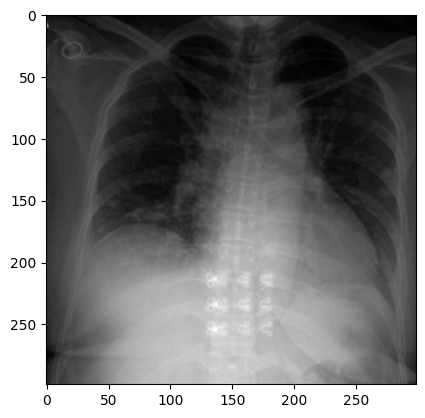

In [6]:
plt.imshow(df_img['radio'].iloc[13], cmap='gray')

Merge des images et de leurs métadonnées dans le DataFrame df

In [6]:
df = df.merge(df_img, on='file_name')
display(df.head())
df.info()

,file_name,format,size,url,classification,shape,radio
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[194, 185, 186, 187, 185, 184, 185, 186, 185,..."
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[99, 230, 255, 255, 255, 255, 255, 255, 255, ..."
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[15, 15, 16, 21, 26, 25, 25, 21, 15, 13, 6, 3..."
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[226, 226, 227, 227, 227, 227, 227, 227, 227,..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       21165 non-null  object
 1   format          21165 non-null  object
 2   size            21165 non-null  object
 3   url             21165 non-null  object
 4   classification  21165 non-null  object
 5   shape           21165 non-null  object
 6   radio           21165 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


Ajout métriques sur l'intensité des pixels et identification d'outliers

Text(0.5, 1.0, 'Répartition intensité moyenne sur écart-type')

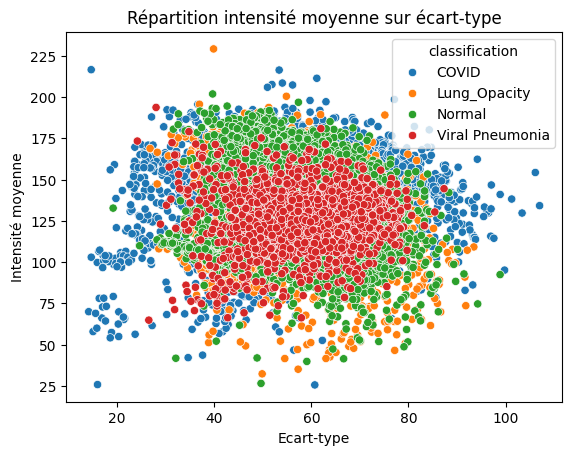

In [7]:
df['intensity_mean'] = df['radio'].apply(lambda x: x.mean())
df['intensity_std'] = df['radio'].apply(lambda x : x.std())

sns.scatterplot(data= df, x= 'intensity_std', y='intensity_mean', hue='classification')
plt.xlabel('Ecart-type')
plt.ylabel('Intensité moyenne')
plt.title("Répartition intensité moyenne sur écart-type")



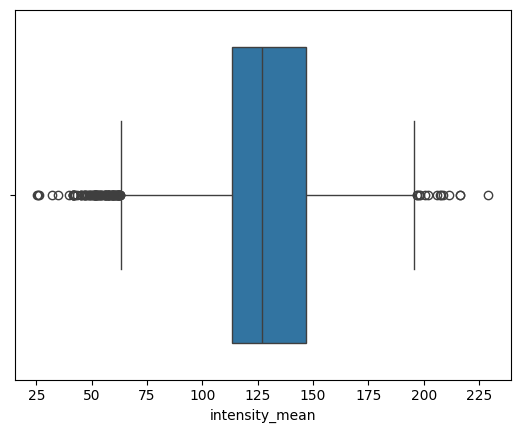

count    21165.000000
mean       129.908506
std         23.491756
min         25.511381
25%        113.313184
50%        127.133891
75%        146.682901
max        229.141676
Name: intensity_mean, dtype: float64


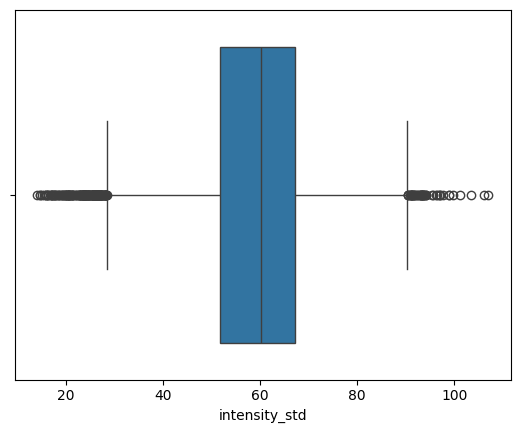

count    21165.000000
mean        59.017312
std         11.104801
min         14.145251
25%         51.657089
50%         60.104209
75%         67.152950
max        106.998675
Name: intensity_std, dtype: float64


In [8]:
sns.boxplot(data=df, x='intensity_mean')
plt.show()
print(df['intensity_mean'].describe())
sns.boxplot(data=df, x= 'intensity_std')
plt.show()
print(df['intensity_std'].describe())



                     

Limite basse : 63.26. Limite haute : 196.74
Limite basse : 28.41. Limite haute : 90.40
3614      25.511381
1875      25.717800
13840     26.443597
7913      32.226899
7245      35.031599
            ...    
3282     208.460308
1530     211.356719
2110     216.342412
1178     216.561839
8655     229.141676
Name: intensity_mean, Length: 101, dtype: float64
2152     14.145251
1178     14.660314
1508     14.670142
1085     15.044313
2454     15.559536
           ...    
1861     99.784756
1136    101.248545
2690    103.388542
2671    106.113419
3075    106.998675
Name: intensity_std, Length: 215, dtype: float64


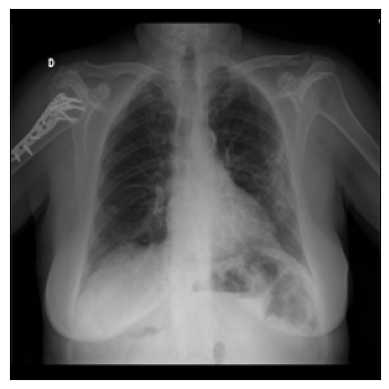

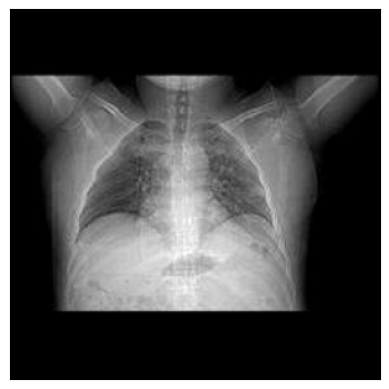

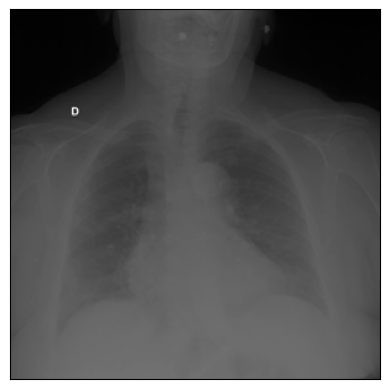

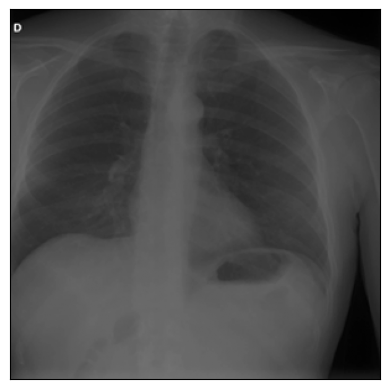

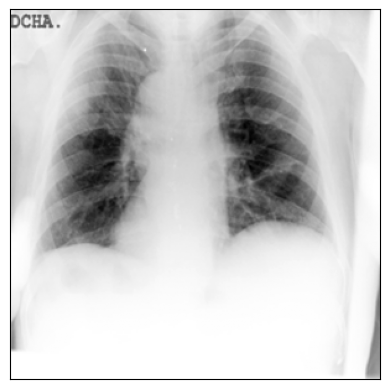

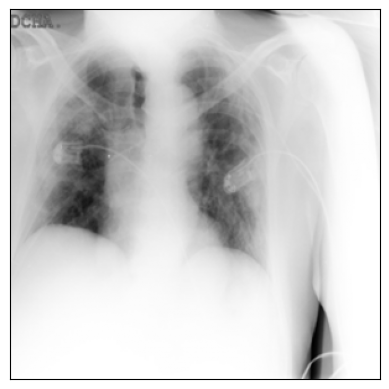

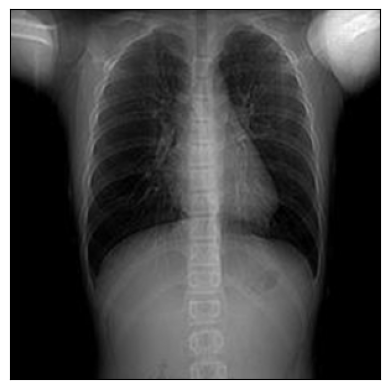

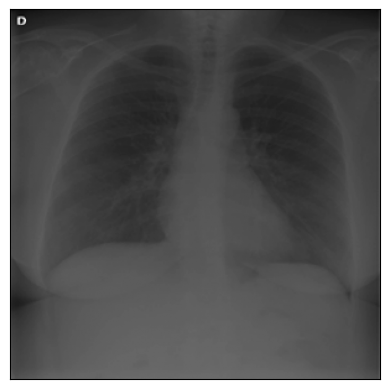

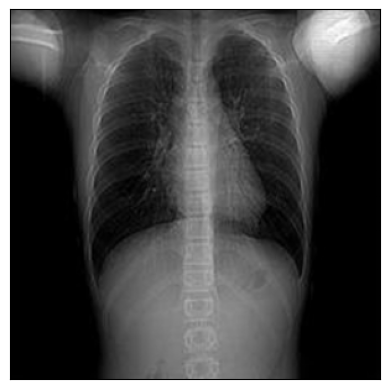

In [9]:
def find_outliers(serie):
    """ Retourne les outliers en dehors de (Q1 - 1.5*IQR) et (Q3 + 1.5*IQR) """
    Q1 = serie.describe()['25%']
    Q3 = serie.describe()['75%']
    IQR = Q3 - Q1
    print("Limite basse : %.2f. Limite haute : %.2f" %((Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

    outliers = serie[(serie < (Q1 - 1.5*IQR)) | (serie > (Q3 + 1.5*IQR))]
    return(outliers)

outliers_mean = find_outliers(df['intensity_mean'])
outliers_std = find_outliers(df['intensity_std'])

print(outliers_mean.sort_values())
print(outliers_std.sort_values())

df_outliers = pd.concat([df.iloc[outliers_mean.index,:], df.iloc[outliers_std.index,:]], axis=0)

for radio in df_outliers['radio'].head(9):
    plt.imshow(radio, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    i +=1


<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 480 to 19654
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       72 non-null     object 
 1   format          72 non-null     object 
 2   size            72 non-null     object 
 3   url             72 non-null     object 
 4   classification  72 non-null     object 
 5   shape           72 non-null     object 
 6   radio           72 non-null     object 
 7   intensity_mean  72 non-null     float64
 8   intensity_std   72 non-null     float64
dtypes: float64(2), object(7)
memory usage: 5.6+ KB


,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std
480,COVID-481,PNG,256*256,https://eurorad.org,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",46.623304,56.380631
696,COVID-697,PNG,256*256,https://github.com/armiro/COVID-CXNet,COVID,"(299, 299)","[[12, 8, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4...",57.301865,18.857386
1085,COVID-1086,PNG,256*256,https://github.com/ieee8023/covid-chestxray-da...,COVID,"(299, 299)","[[33, 11, 6, 7, 9, 10, 9, 9, 10, 10, 10, 11, 1...",57.835953,15.044313
1119,COVID-1120,PNG,256*256,https://github.com/ieee8023/covid-chestxray-da...,COVID,"(299, 299)","[[72, 71, 72, 75, 81, 89, 94, 95, 90, 85, 83, ...",57.683247,53.402551
1231,COVID-1232,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID,"(299, 299)","[[8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",59.207906,35.439466
1321,COVID-1322,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID,"(299, 299)","[[39, 34, 30, 28, 24, 20, 16, 13, 11, 10, 10, ...",54.060357,18.579408
1756,COVID-1757,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID,"(299, 299)","[[8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",42.052706,34.622105
1875,COVID-1876,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID,"(299, 299)","[[16, 12, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.717800,15.965490
2106,COVID-2107,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,COVID,"(299, 299)","[[28, 24, 20, 16, 13, 12, 12, 12, 12, 12, 12, ...",56.214450,23.707168


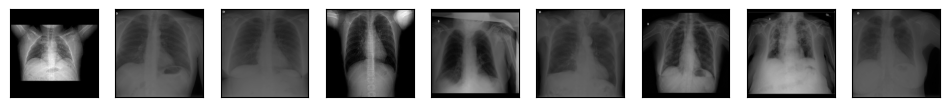

In [10]:
# intensité très élevée : un peu floues (à voir après normalisation)
df_outlier_200 = df[df['intensity_mean'] > 200]

# Intensité moyenne très faible : radios mal cadrées ou luminosité très faible
df_outlier = df[df['intensity_mean'] <60]

# Intensité moyenne faible et variance faible : radios floues
df_outlier_bg = df[(df['intensity_mean'] <90) & (df['intensity_std'] < 35)] 

# Variance très élevée : radios mal cadrées
df_outlier_v90 = df[df['intensity_std'] > 90] 

# Variance très faible : radios surexposées ou peu lumineuses (à voir après normalisation)
df_outlier_v22 = df[df['intensity_std'] < 22] 

df_outlier.info()
display(df_outlier.head(9))

plt.figure(figsize=(12,8))
i=1
for radio in df_outlier['radio'].head(9):
    plt.subplot(1,9,i)
    plt.imshow(radio, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    i +=1

plt.show()

# Normalisation des radios

Test sur 1 radio : déjà normalisée

[[221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 ...
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]]
[[221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 ...
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]
 [221 249 255 ... 255 249 221]]
images identiques


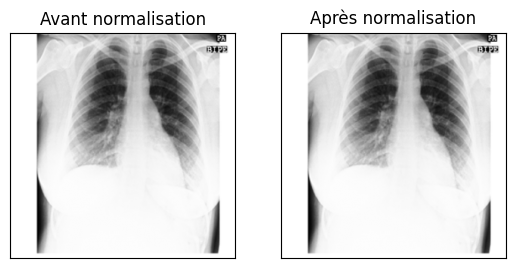

In [11]:
# Test de normalisation
radio = df['radio'].iloc[1530]
plt.subplot(121)
plt.imshow(radio, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Avant normalisation")

radio_norm = cv2.normalize(radio, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.subplot(122)
plt.imshow(radio_norm, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Après normalisation")
print(radio)
print(radio_norm)

if (radio == radio_norm).all():
    print("images identiques")

Généralisation au dataset

In [12]:
radio_norm_list = []
is_norm_list = []

for radio in df['radio']:
    # calcul de l'image normalisée
    radio_norm = cv2.normalize(radio, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # comparaison avec la radio du dataset
    is_norm = (radio == radio_norm).all()

    # ajout dans les listes
    radio_norm_list.append(radio_norm)
    is_norm_list.append(is_norm)

# Ajout des colonnes à df
df = pd.concat([df, pd.DataFrame({'radio_norm' : radio_norm_list, 'is_norm': is_norm_list})], axis=1)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       21165 non-null  object 
 1   format          21165 non-null  object 
 2   size            21165 non-null  object 
 3   url             21165 non-null  object 
 4   classification  21165 non-null  object 
 5   shape           21165 non-null  object 
 6   radio           21165 non-null  object 
 7   intensity_mean  21165 non-null  float64
 8   intensity_std   21165 non-null  float64
 9   radio_norm      21165 non-null  object 
 10  is_norm         21165 non-null  bool   
dtypes: bool(1), float64(2), object(8)
memory usage: 1.6+ MB


,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std,radio_norm,is_norm
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",145.896847,51.816632,"[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[194, 185, 186, 187, 185, 184, 185, 186, 185,...",150.640530,48.867698,"[[201, 189, 191, 192, 189, 188, 189, 191, 189,...",False
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",140.598617,50.200679,"[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",True
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[15, 15, 16, 21, 26, 25, 25, 21, 15, 13, 6, 3...",116.714679,57.719773,"[[14, 14, 15, 20, 25, 24, 24, 20, 14, 12, 5, 2...",False
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[226, 226, 227, 227, 227, 227, 227, 227, 227,...",167.835796,48.413412,"[[231, 231, 232, 232, 232, 232, 232, 232, 232,...",False


,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std,radio_norm,is_norm
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",145.896847,51.816632,"[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[194, 185, 186, 187, 185, 184, 185, 186, 185,...",150.640530,48.867698,"[[201, 189, 191, 192, 189, 188, 189, 191, 189,...",False
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",140.598617,50.200679,"[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",True
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[15, 15, 16, 21, 26, 25, 25, 21, 15, 13, 6, 3...",116.714679,57.719773,"[[14, 14, 15, 20, 25, 24, 24, 20, 14, 12, 5, 2...",False
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[226, 226, 227, 227, 227, 227, 227, 227, 227,...",167.835796,48.413412,"[[231, 231, 232, 232, 232, 232, 232, 232, 232,...",False


is_norm
False    0.705835
True     0.294165
Name: proportion, dtype: float64


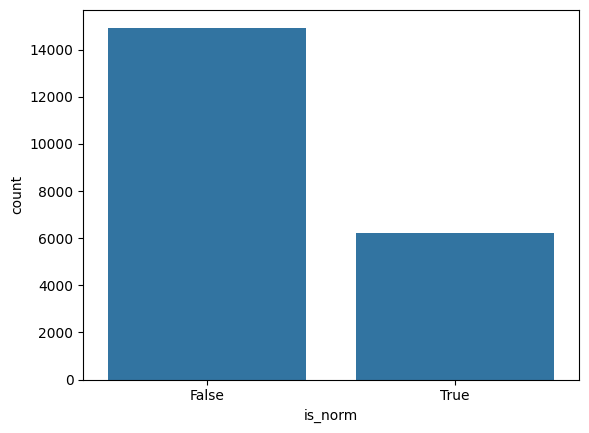

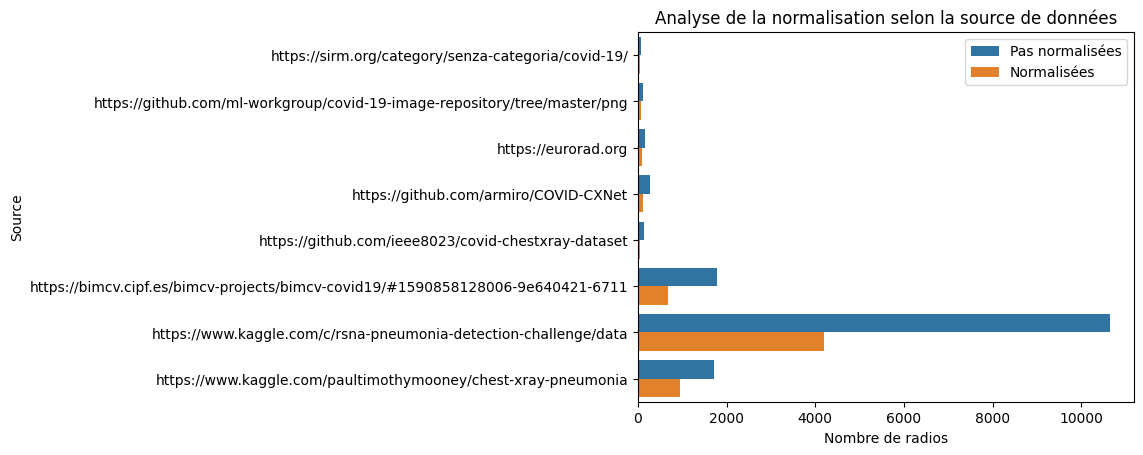

url                                                                              is_norm
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711  False      0.721504
                                                                                 True       0.278496
https://eurorad.org                                                              False      0.608527
                                                                                 True       0.391473
https://github.com/armiro/COVID-CXNet                                            False      0.690000
                                                                                 True       0.310000
https://github.com/ieee8023/covid-chestxray-dataset                              False      0.780220
                                                                                 True       0.219780
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png        False      0.639344
  

c:\Users\H95651\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


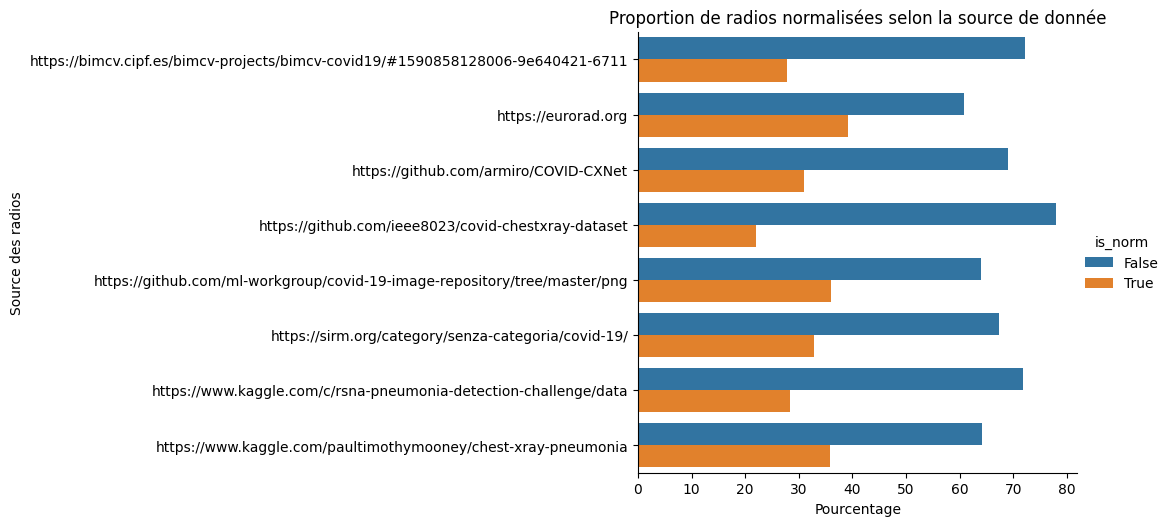

In [13]:
display(df.head())

print(df['is_norm'].value_counts(normalize=True))
sns.countplot(data=df, x='is_norm')
plt.show()
sns.countplot(data=df, y='url', hue='is_norm')
plt.xlabel("Nombre de radios")
plt.ylabel("Source")
plt.legend(labels=["Pas normalisées", "Normalisées"])
plt.title("Analyse de la normalisation selon la source de données")
plt.show()

# Affichage en pourcentage selon source de données
print(df[['url', 'is_norm']].groupby('url').value_counts(normalize=True))

# Graphe
# A FAIRE
# Pour améliorer la légende, remplacer les valeurs de 'is_norm'

data = (df[['url', 'is_norm']]
 .groupby('url')['is_norm']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index())

ax = sns.catplot(data, y='url', x='percent', hue='is_norm', kind='bar')


# pour récupérer les labels et les modifier // ne marche pas avec cette version de seaborn
# legend_handles, _= ax.get_legend_handles_labels()
# ax.legend(legend_handles, ["Pas normalisées", "Normalisées"], loc='right')
plt.xlabel('Pourcentage')
plt.ylabel('Source des radios')
plt.title('Proportion de radios normalisées selon la source de donnée')
plt.show()

Visualisation avant/après normalisation

In [15]:
df[df['is_norm'] == False].head()

,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std,radio_norm,is_norm
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[194, 185, 186, 187, 185, 184, 185, 186, 185,...",150.640530,48.867698,"[[201, 189, 191, 192, 189, 188, 189, 191, 189,...",False
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[15, 15, 16, 21, 26, 25, 25, 21, 15, 13, 6, 3...",116.714679,57.719773,"[[14, 14, 15, 20, 25, 24, 24, 20, 14, 12, 5, 2...",False
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[226, 226, 227, 227, 227, 227, 227, 227, 227,...",167.835796,48.413412,"[[231, 231, 232, 232, 232, 232, 232, 232, 232,...",False
5,COVID-6,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[34, 33, 34, 33, 32, 33, 33, 33, 32, 33, 34, ...",152.102057,39.936527,"[[40, 39, 40, 39, 38, 39, 39, 39, 38, 39, 40, ...",False
6,COVID-7,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[144, 145, 145, 144, 142, 142, 141, 141, 140,...",149.370208,56.674193,"[[148, 149, 149, 148, 146, 146, 145, 145, 144,...",False


[[194 185 186 ...  82  74  73]
 [193 182 181 ...  86  74  71]
 [197 186 184 ...  91  79  72]
 ...
 [ 96  65  61 ... 111 111 112]
 [ 97  65  62 ... 111 110 111]
 [ 97  65  60 ... 111 110 111]]
[[201 189 191 ...  62  52  51]
 [199 186 184 ...  67  52  48]
 [204 191 188 ...  73  58  50]
 ...
 [ 79  41  36 ...  98  98  99]
 [ 80  41  37 ...  98  97  98]
 [ 80  41  35 ...  98  97  98]]


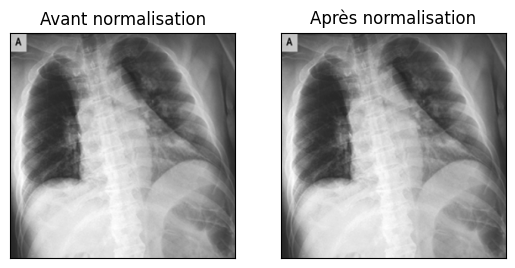

In [16]:
radio = df['radio'].iloc[1]
plt.subplot(121)
plt.imshow(radio, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Avant normalisation")
print(radio)

radio_norm = df['radio_norm'].iloc[1]
plt.subplot(122)
plt.imshow(radio_norm, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Après normalisation")
print(radio_norm)

Ajout des infos d'intensité moyenne et écart-type des radios normalisées

Text(0.5, 1.0, 'Répartition intensité moyenne selon écart-type après normalisation')

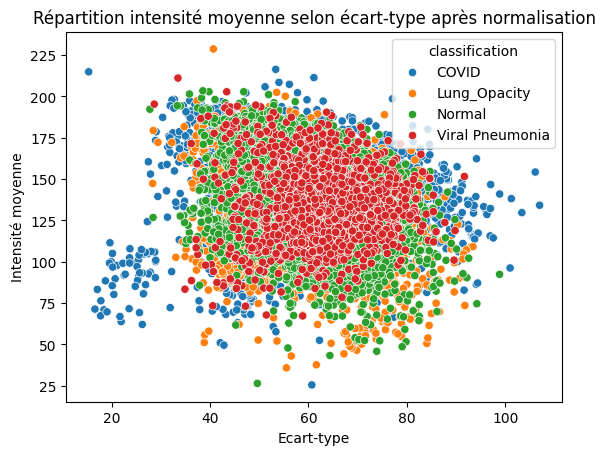

In [14]:
df['norm_intensity_mean'] = df['radio_norm'].apply(lambda x: x.mean())
df['norm_intensity_std'] = df['radio_norm'].apply(lambda x : x.std())

sns.scatterplot(data= df, x= 'norm_intensity_std', y='norm_intensity_mean', hue='classification')
plt.xlabel('Ecart-type')
plt.ylabel('Intensité moyenne')
plt.title("Répartition intensité moyenne selon écart-type après normalisation")

Limite basse : 68.03. Limite haute : 204.06
Limite basse : 34.35. Limite haute : 89.62
3614      25.511381
13840     26.443597
7913      35.857026
7245      37.689903
9620      43.009396
            ...    
19858    211.069462
1530     211.356719
1178     214.855863
2110     216.342412
8655     228.693583
Name: norm_intensity_mean, Length: 106, dtype: float64
1178     15.350980
2454     16.615506
2152     17.098981
2181     17.769472
1435     17.827434
           ...    
1861    101.001598
1136    101.248545
2690    103.388542
2671    106.113419
3075    106.998675
Name: norm_intensity_std, Length: 179, dtype: float64


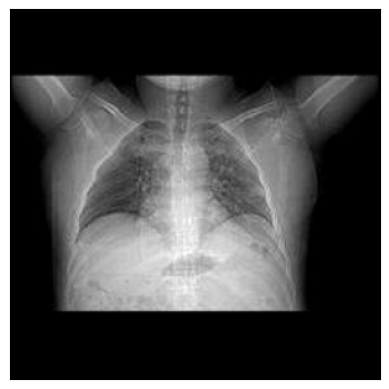

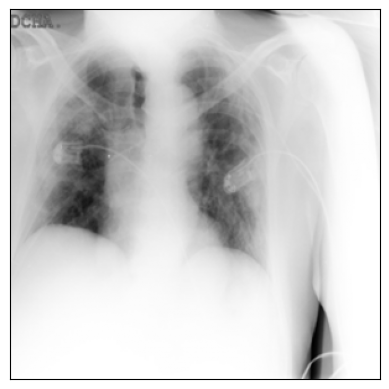

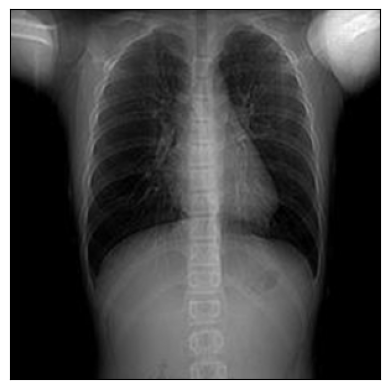

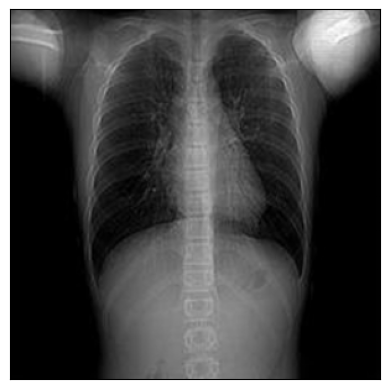

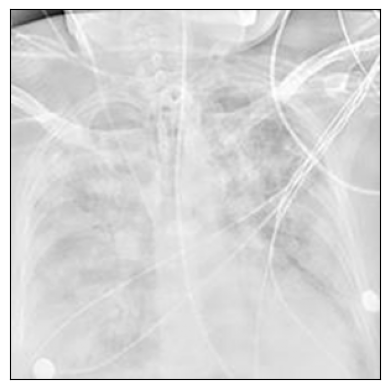

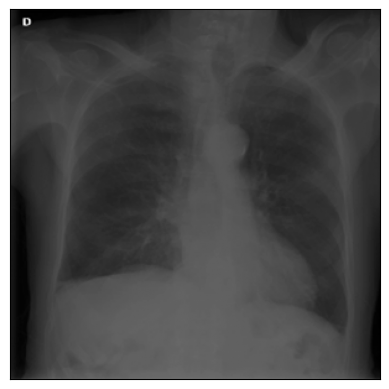

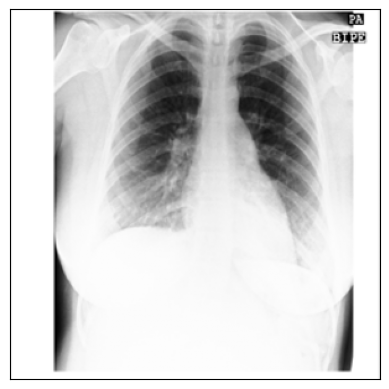

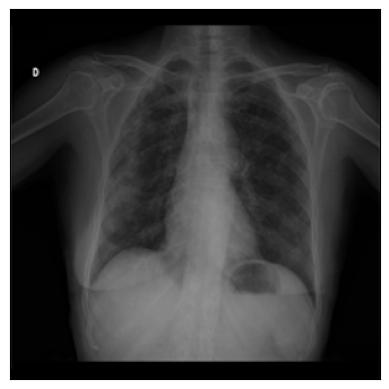

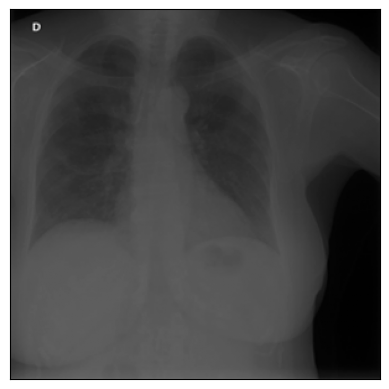

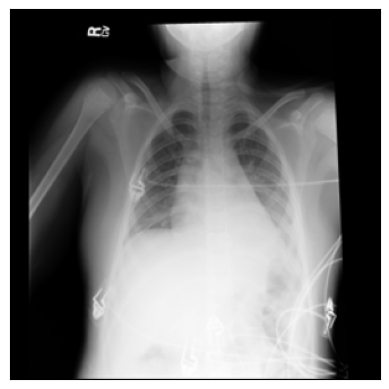

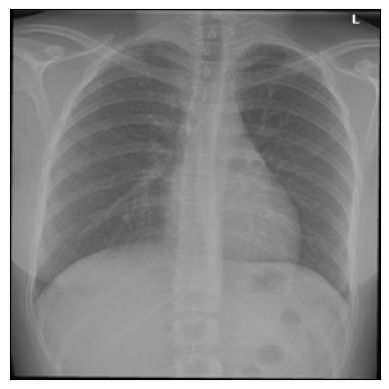

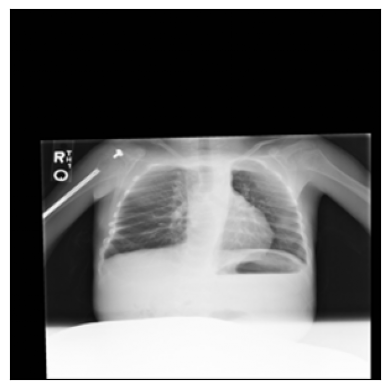

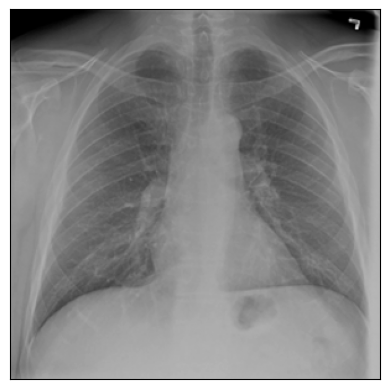

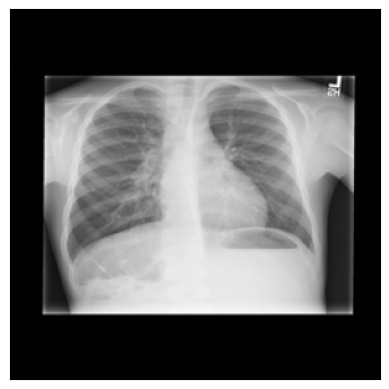

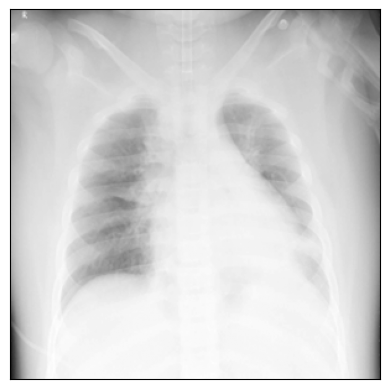

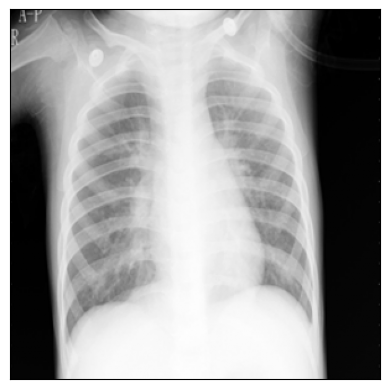

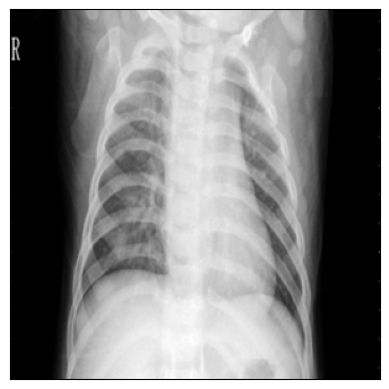

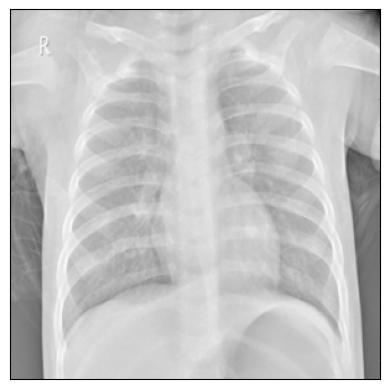

In [15]:
outliers_norm_mean = find_outliers(df['norm_intensity_mean'])
outliers_norm_std = find_outliers(df['norm_intensity_std'])

print(outliers_norm_mean.sort_values())
print(outliers_norm_std.sort_values())

df_outliers_norm = pd.concat([df.iloc[outliers_norm_mean.index,:], df.iloc[outliers_norm_std.index,:]], axis=0)

# Export liste des fichiers dans fichier csv
df_outliers_norm['file_name'].to_csv('outliers.csv', index=False)

# Affichage qqs outliers

for radio in df_outliers_norm['radio'].head(9):
    plt.imshow(radio, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    i +=1

for radio in df_outliers_norm['radio'].tail(9):
    plt.imshow(radio, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    i +=1

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 130 to 19935
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_name            67 non-null     object 
 1   format               67 non-null     object 
 2   size                 67 non-null     object 
 3   url                  67 non-null     object 
 4   classification       67 non-null     object 
 5   shape                67 non-null     object 
 6   radio                67 non-null     object 
 7   intensity_mean       67 non-null     float64
 8   intensity_std        67 non-null     float64
 9   radio_norm           67 non-null     object 
 10  is_norm              67 non-null     bool   
 11  norm_intensity_mean  67 non-null     float64
 12  norm_intensity_std   67 non-null     float64
dtypes: bool(1), float64(4), object(8)
memory usage: 6.9+ KB


,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std,radio_norm,is_norm,norm_intensity_mean,norm_intensity_std
130,COVID-131,PNG,256*256,https://github.com/ml-workgroup/covid-19-image...,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",116.532712,93.171399,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,116.532712,93.171399
232,COVID-233,PNG,256*256,https://github.com/ml-workgroup/covid-19-image...,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",135.508361,92.953227,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,135.508361,92.953227
257,COVID-258,PNG,256*256,https://github.com/ml-workgroup/covid-19-image...,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",129.423575,93.554906,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,129.423575,93.554906
307,COVID-308,PNG,256*256,https://eurorad.org,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",129.792922,96.482230,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,129.792922,96.482230
557,COVID-558,PNG,256*256,https://eurorad.org,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",137.094048,92.330660,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,137.094048,92.330660
664,COVID-665,PNG,256*256,https://github.com/armiro/COVID-CXNet,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",114.898021,93.376858,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,114.898021,93.376858
790,COVID-791,PNG,256*256,https://github.com/armiro/COVID-CXNet,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",130.208722,96.160278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,130.208722,96.160278
1037,COVID-1038,PNG,256*256,https://github.com/ieee8023/covid-chestxray-da...,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",122.858738,91.125487,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,122.858738,91.125487
1131,COVID-1132,PNG,256*256,https://github.com/ieee8023/covid-chestxray-da...,COVID,"(299, 299)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",136.806344,93.231462,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,136.806344,93.231462


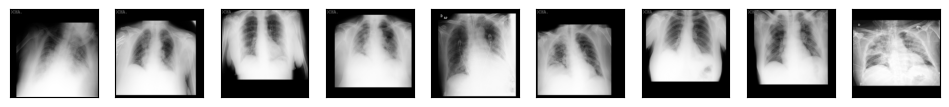

In [16]:
# intensité très élevée : floues et/ou surexposées
df_outlier_200 = df[df['norm_intensity_mean'] > 200]

# Intensité moyenne très faible : radios mal cadrées
df_outlier_60 = df[df['norm_intensity_mean'] <60]

# Intensité moyenne faible et variance faible : radios floues
df_outlier_bg = df[(df['norm_intensity_mean'] <90) & (df['norm_intensity_std'] < 35)] 

# Variance très élevée : radios mal cadrées
df_outlier = df[df['norm_intensity_std'] > 90] 

# Variance très faible : radios surexposées ou peu lumineuses
df_outlier_v30 = df[df['norm_intensity_std'] < 30] 

df_outlier.info()
display(df_outlier.head(9))

plt.figure(figsize=(12,12))
i=1
for radio in df_outlier['radio_norm'].head(9):
    plt.subplot(1,9,i)
    plt.imshow(radio, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    i +=1

plt.show()

# Recherche des doublons

In [17]:
import hashlib

hash_list = []

for radio in df['radio']:
    sha256 = hashlib.sha256()
    # fonction de hash nécessite conversion en objet 'byte-compatible'
    sha256.update(radio.tobytes())
    # calcul du hash et ajout à la liste
    radio_hash = sha256.hexdigest()
    hash_list.append(radio_hash)
    
df_hash = pd.DataFrame({'hash': hash_list})
df_hash.info()
df_hash.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    21165 non-null  object
dtypes: object(1)
memory usage: 165.5+ KB


,hash
0,960e592239a81851421c1edf31125154a83830429918c1...
1,af04ce565fe274d5b1266b3301f1e6c3a6ddd44c09564a...
2,90af33191e35fc8243a68a331e99de282138080383c5a9...
3,159b21b273bfdfe0b12b853e1bef2766e41521202856cc...
4,a82654a139da38cf5bbf6003bf28d7839c45638c952e95...


In [21]:
df = pd.concat([df, df_hash], axis=1)
df.head()

,file_name,format,size,url,classification,shape,radio,intensity_mean,intensity_std,radio_norm,is_norm,norm_intensity_mean,norm_intensity_std,hash
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",145.896847,51.816632,"[[185, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",True,145.896847,51.816632,960e592239a81851421c1edf31125154a83830429918c1...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[194, 185, 186, 187, 185, 184, 185, 186, 185,...",150.640530,48.867698,"[[201, 189, 191, 192, 189, 188, 189, 191, 189,...",False,146.863022,60.478157,af04ce565fe274d5b1266b3301f1e6c3a6ddd44c09564a...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",140.598617,50.200679,"[[99, 230, 255, 255, 255, 255, 255, 255, 255, ...",True,140.598617,50.200679,90af33191e35fc8243a68a331e99de282138080383c5a9...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[15, 15, 16, 21, 26, 25, 25, 21, 15, 13, 6, 3...",116.714679,57.719773,"[[14, 14, 15, 20, 25, 24, 24, 20, 14, 12, 5, 2...",False,116.175971,58.136789,159b21b273bfdfe0b12b853e1bef2766e41521202856cc...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,"(299, 299)","[[226, 226, 227, 227, 227, 227, 227, 227, 227,...",167.835796,48.413412,"[[231, 231, 232, 232, 232, 232, 232, 232, 232,...",False,160.982539,58.230226,a82654a139da38cf5bbf6003bf28d7839c45638c952e95...


<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 17 to 20872
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_name            103 non-null    object 
 1   format               103 non-null    object 
 2   size                 103 non-null    object 
 3   url                  103 non-null    object 
 4   classification       103 non-null    object 
 5   shape                103 non-null    object 
 6   radio                103 non-null    object 
 7   intensity_mean       103 non-null    float64
 8   intensity_std        103 non-null    float64
 9   radio_norm           103 non-null    object 
 10  is_norm              103 non-null    bool   
 11  norm_intensity_mean  103 non-null    float64
 12  norm_intensity_std   103 non-null    float64
 13  hash                 103 non-null    object 
dtypes: bool(1), float64(4), object(9)
memory usage: 11.4+ KB
17                   COVID-18
20   

,count,list
0,7,"[COVID-2807, COVID-2808, COVID-2809, COVID-281..."
1,5,"[COVID-2715, COVID-2716, COVID-2717, COVID-271..."
2,5,"[COVID-3140, COVID-3141, COVID-3142, COVID-314..."
3,4,"[COVID-3373, COVID-3374, COVID-3375, COVID-3376]"
4,3,"[COVID-2772, COVID-2773, COVID-2774]"
5,3,"[COVID-2419, COVID-2420, COVID-2421]"
6,2,"[COVID-3222, COVID-3223]"
7,2,"[COVID-2422, COVID-2423]"
8,2,"[COVID-3598, COVID-3599]"
9,2,"[COVID-3426, COVID-3427]"


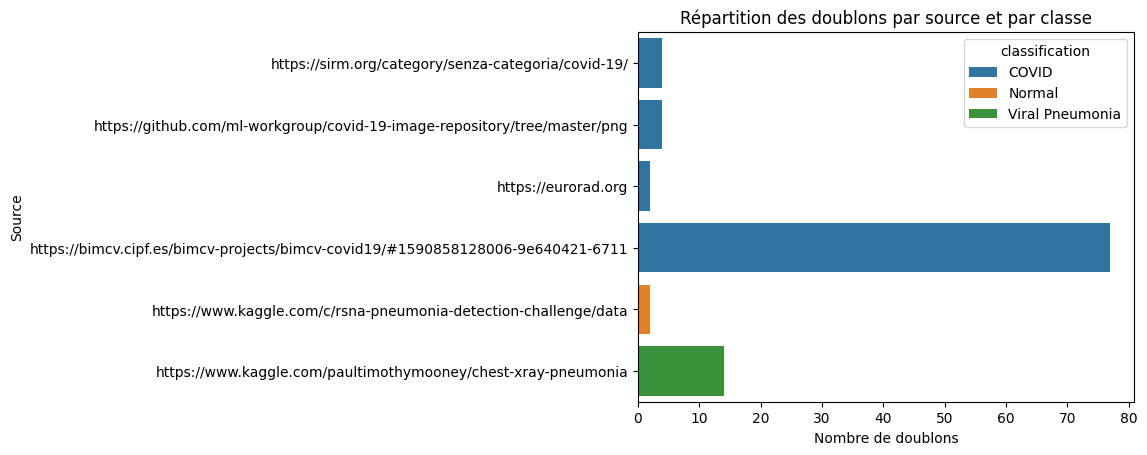

In [22]:
# Dataframe avec tous les doublons (keep=False)
df_doublons = df.duplicated(subset='hash', keep=False)

nb_doublons = df_doublons.sum()

# Affichage selon source et classe
df[df_doublons].info()
sns.countplot(data=df[df_doublons], y='url', hue='classification')
plt.xlabel("Nombre de doublons")
plt.ylabel("Source")
plt.title("Répartition des doublons par source et par classe")

print(df[df_doublons]['file_name'])
# Affichage de la liste
doublons_list = df[df_doublons].groupby('hash')['file_name'].agg({'count', list}).sort_values(by='count', ascending=False)
print("Il y a %i images différentes parmi les %i doublons." %(len(doublons_list), nb_doublons))

doublons_list.reset_index(inplace=True)
display(doublons_list[['count','list']])

# Export liste des doublons
doublons_list[['count','list']].to_csv('Doublons_liste.csv', index=False)